<a href="https://colab.research.google.com/github/roopasneha/task7/blob/main/task7_Decision_Trees_Assignment15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [2]:
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, plot_roc_curve
import matplotlib.pyplot as plt
from sklearn import tree

**Importing the dataset**

In [19]:
df=pd.read_csv('/content/Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [21]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [22]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [23]:
from sklearn import preprocessing
df["Gender"]=df[["Gender"]].apply(preprocessing.LabelEncoder().fit_transform)

In [24]:
df=df.drop(columns="User ID")
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


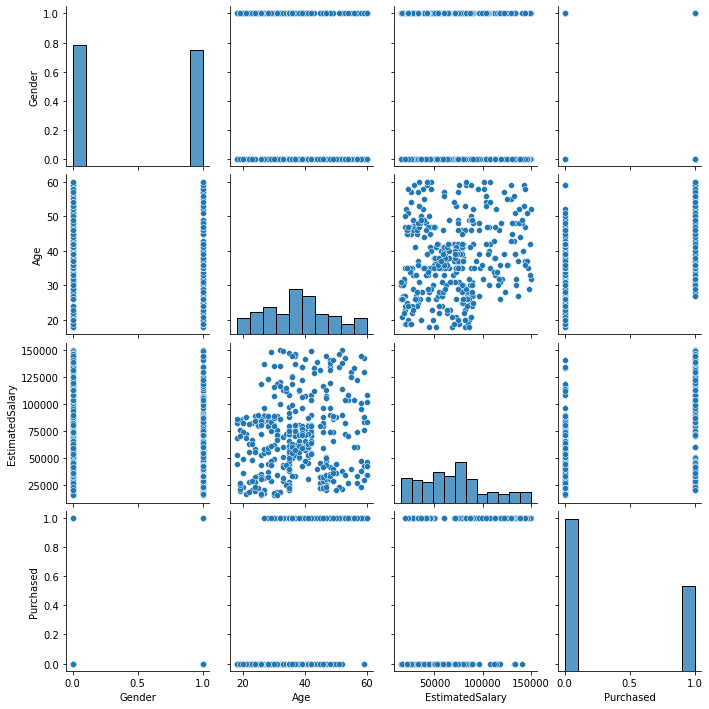

In [25]:
#import seaborn as sns
sns.pairplot(df)

In [26]:
x=df.drop(columns="Purchased")
x

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [27]:
y=df["Purchased"]
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

**Splitting the dataset into the Training set and Test set**

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

print("Xtrain shape: ",x_train.shape)
print("Ytest shape: ",y_test.shape)
print("Xtrain shape: ",x_train.shape)
print("Ytest shape: ",y_test.shape)

Xtrain shape:  (320, 3)
Ytest shape:  (80,)
Xtrain shape:  (320, 3)
Ytest shape:  (80,)


**Feature Scaling**

In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train) #fit (mean, sd) and then transform the training data
x_test_scaled=scaler.transform(x_test)

**Fitting Decision Tree Classification to the Training set**

In [30]:
#from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=2)#dt with a maximum depth

#training set
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

**Predicting the Test set results**

In [31]:
y_pred = dt.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1])

**Making the Confusion Matrix**

In [33]:
#from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[48  5]
 [ 1 26]]


**Visualising the Training set results**

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94        53
           1       0.84      0.96      0.90        27

    accuracy                           0.93        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80



Test set accuracy: 0.93
Train set auc: 0.93


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


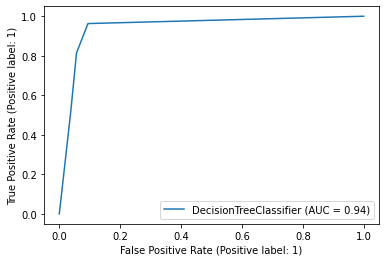

In [37]:

# from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
#we compute the eval metric on test/validation set only primarily

# Predict test set labels
y_pred = dt.predict(x_test) 

# Compute test set accuracy
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))
acc = roc_auc_score(y_test, y_pred)
print("Train set auc: {:.2f}".format(acc))
plot_roc_curve(dt, x_test, y_test)

**Visualising the Training set results**

[Text(0.5, 0.8333333333333334, 'X[1] <= 42.5\ngini = 0.462\nsamples = 320\nvalue = [204, 116]'),
 Text(0.25, 0.5, 'X[2] <= 89500.0\ngini = 0.273\nsamples = 227\nvalue = [190, 37]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.071\nsamples = 189\nvalue = [182, 7]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.332\nsamples = 38\nvalue = [8, 30]'),
 Text(0.75, 0.5, 'X[1] <= 46.5\ngini = 0.256\nsamples = 93\nvalue = [14, 79]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.444\nsamples = 18\nvalue = [6, 12]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.191\nsamples = 75\nvalue = [8, 67]')]

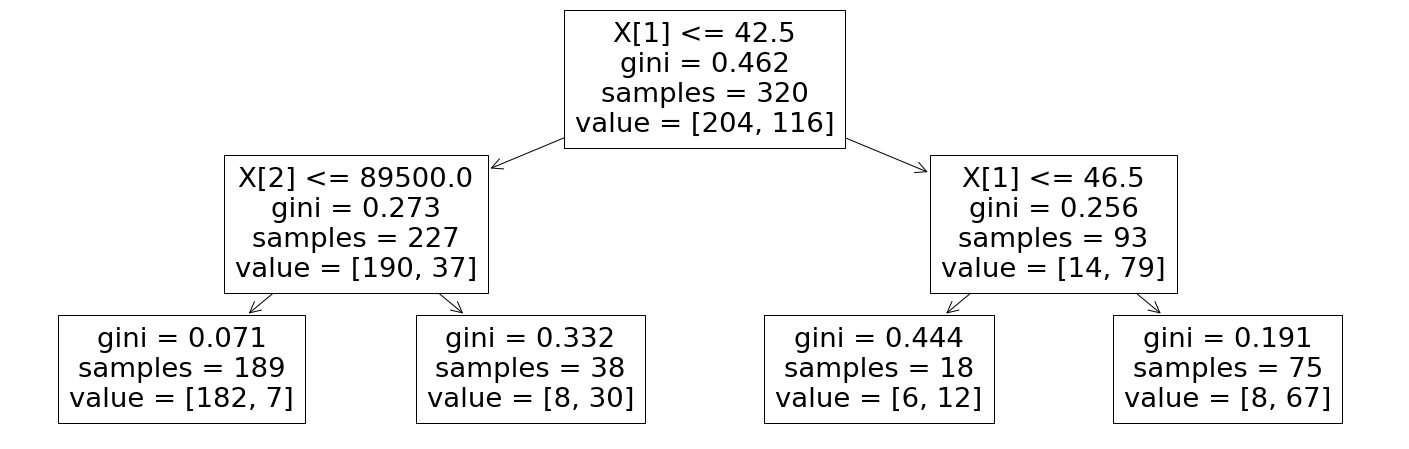

In [38]:
# import matplotlib.pyplot as plt
plt.figure(figsize=(25,8))

# from sklearn import tree

tree.plot_tree(dt.fit(x_train, y_train))

**Visualising the Test set results**

[Text(0.5, 0.8333333333333334, 'X[1] <= 43.5\ngini = 0.447\nsamples = 80\nvalue = [53, 27]'),
 Text(0.25, 0.5, 'X[2] <= 93000.0\ngini = 0.262\nsamples = 58\nvalue = [49, 9]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.039\nsamples = 50\nvalue = [49, 1]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.75, 0.5, 'X[2] <= 61500.0\ngini = 0.298\nsamples = 22\nvalue = [4, 18]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.444\nsamples = 12\nvalue = [4, 8]')]

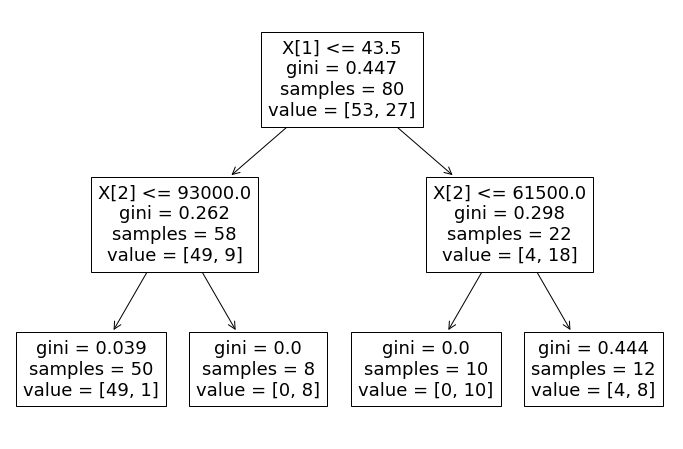

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))

# from sklearn import tree

tree.plot_tree(dt.fit(x_test, y_test))

In [40]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)


# fit the model
clf_en.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)

In [41]:
y_pred_en = clf_en.predict(x_test)

In [42]:
# from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9250


In [43]:
y_pred_train_en = clf_en.predict(x_train)

y_pred_train_en

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,

In [47]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.9094


In [49]:
print('Training set score: {:.4f}'.format(clf_en.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(x_test, y_test)))

Training set score: 0.9094
Test set score: 0.9250


[Text(0.5, 0.8333333333333334, 'X[1] <= 43.5\nentropy = 0.922\nsamples = 80\nvalue = [53, 27]'),
 Text(0.25, 0.5, 'X[2] <= 93000.0\nentropy = 0.623\nsamples = 58\nvalue = [49, 9]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.141\nsamples = 50\nvalue = [49, 1]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.75, 0.5, 'X[2] <= 61500.0\nentropy = 0.684\nsamples = 22\nvalue = [4, 18]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.918\nsamples = 12\nvalue = [4, 8]')]

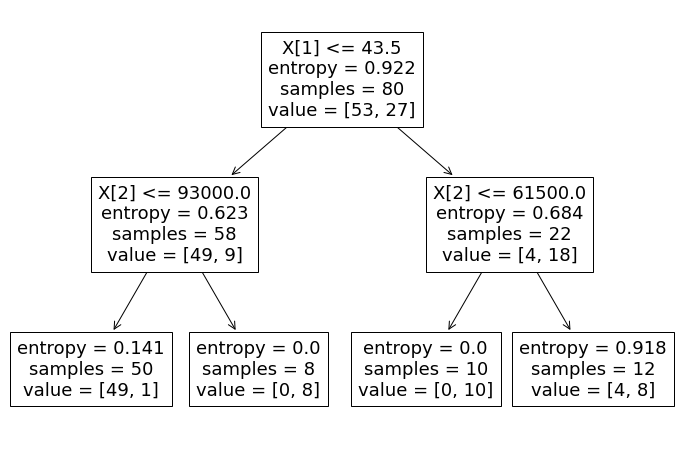

In [50]:
# import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))

# from sklearn import tree

tree.plot_tree(clf_en.fit(x_test, y_test))

[Text(0.5, 0.8333333333333334, 'X[1] <= 42.5\nentropy = 0.945\nsamples = 320\nvalue = [204, 116]'),
 Text(0.25, 0.5, 'X[2] <= 89500.0\nentropy = 0.641\nsamples = 227\nvalue = [190, 37]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.229\nsamples = 189\nvalue = [182, 7]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.742\nsamples = 38\nvalue = [8, 30]'),
 Text(0.75, 0.5, 'X[2] <= 38500.0\nentropy = 0.611\nsamples = 93\nvalue = [14, 79]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.216\nsamples = 29\nvalue = [1, 28]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.728\nsamples = 64\nvalue = [13, 51]')]

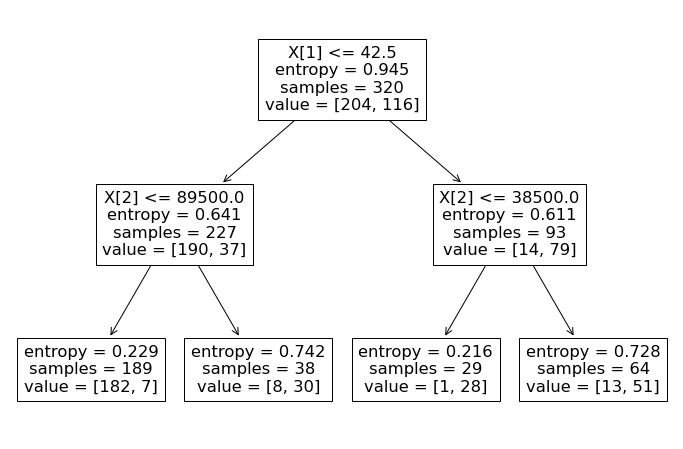

In [51]:
# import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))

# from sklearn import tree

tree.plot_tree(clf_en.fit(x_train, y_train))